In [25]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
def T(LambdaCDM,z): #cosmology and redshift
    a_f = 1/1+z
    H_0 = LambdaCDM.h()*100
    omega_mz = LambdaCDM.Omega_m()
    c = 299792.458
    primordial = LambdaCDM.get_primordial()
    k_1 = primordial['k [1/Mpc]']
    Ppk_cl = primordial['P_scalar(k)']
    Pk = []
    Phi = []
    for k in k_1:
            Pk.append(LambdaCDM.pk(k * LambdaCDM.h(), 0.) * LambdaCDM.h() ** 3)
    for i in range (len(k_1)):
        Phi.append(k_1[i]**(1.5)*np.sqrt(Pk[i]/Ppk_cl[i])*(3*(H_0**2)*omega_mz)/(2*((c*k_1[i])**2)*a_f))
    return np.array(Phi)

In [4]:
def k(LambdaCDM):
    primordial = LambdaCDM.get_primordial()
    k_1 = primordial['k [1/Mpc]']
    return k_1

In [10]:
#redshift
z = 0
A_s = 2.100549e-09
n_s = 0.965
# valore vero 0.0223828 e 0.1201075
obar = np.linspace(0.0213828,0.0233828,4, endpoint=True)
ocar = np.linspace(0.1101075,0.1301075,4,endpoint=True)

grid = [] #the pairs are (omega_b,omega_c)

for a in obar:
    line = []
    for b in ocar:
        pair = (round(a, 4), round(b, 4))
        line.append(pair)
    grid.append(line)

[[(0.0214, 0.1101), (0.0214, 0.1168), (0.0214, 0.1234), (0.0214, 0.1301)], [(0.022, 0.1101), (0.022, 0.1168), (0.022, 0.1234), (0.022, 0.1301)], [(0.0227, 0.1101), (0.0227, 0.1168), (0.0227, 0.1234), (0.0227, 0.1301)], [(0.0234, 0.1101), (0.0234, 0.1168), (0.0234, 0.1234), (0.0234, 0.1301)]]


In [11]:
# Inizializza la matrice vuota per i modelli LambdaCDM
LambdaCDM_mat = []

# Crea il modello Lambda-CDM per ciascun valore nella matrice grid
for row in grid:
    LambdaCDM_row = []  # Riga per i modelli LambdaCDM
    for omega_b, omega_cdm in row:
        LambdaCDM = Class()
        LambdaCDM.set({
            'omega_b': omega_b,
            'omega_cdm': omega_cdm,
            'h': 0.67810,
            'A_s': 2.100549e-09,
            'n_s': 0.9660499,
            'tau_reio': 0.05430842,
            'N_ncdm': 1,
            'm_ncdm': 0.06
        })
        LambdaCDM.set({
            'output': 'tCl,pCl,lCl,mPk',
            'lensing': 'yes',
            'P_k_max_1/Mpc': 3.0
        })
        LambdaCDM.compute()
        LambdaCDM_row.append(LambdaCDM)
    LambdaCDM_mat.append(LambdaCDM_row)

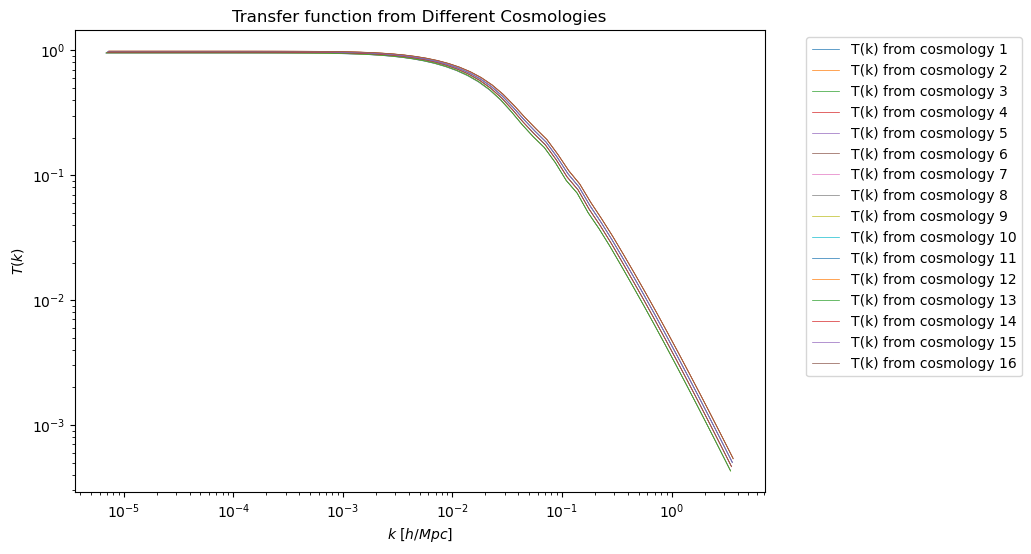

In [32]:
l = len(LambdaCDM_mat) 
plt.figure(figsize=(12, 6)) 
for i in range(l):
    for j in range(l):
        title = 'T(k) from cosmology ' + str(i*l + j + 1)
        plt.loglog(k(LambdaCDM_mat[i][j]), T(LambdaCDM_mat[i][j], z), label=title, lw=0.5)
        
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.7)  # Aumenta lo spazio destro per fare spazio alla legenda

plt.xlabel('$k \ [h/Mpc]$')
plt.ylabel('$T(k)$')
plt.title('Transfer function from Different Cosmologies')
plt.show()

In [44]:
k_int = []
T_int = []
for i in range(l):
    for j in range(l):
        k_int.append(k(LambdaCDM_mat[i][j]))
        T_int.append(T(LambdaCDM_mat[i][j],z))

k_f = []
T_f = []
for a in k_int:
    k_f.extend(a)
for a in T_int:
    T_f.extend(a)

[]

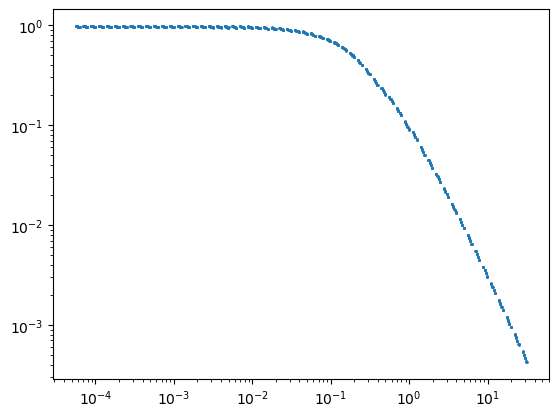

In [60]:
x_1 = []
for i in range(l):
    for j in range(l):
        x_1.append(k(LambdaCDM_mat[i][j])/grid[i][j][1])
x_f = []
for a in x_1:
    x_f.extend(a)
plt.scatter(x_1,T_f,s=1)
plt.loglog()

In [61]:
data = {'k (h/Mpc)': k_f,'x': x_f, 'T(k)': T_f}
df = pd.DataFrame(data)
df.to_csv('TF_16cosmo.csv', index=False) 